In [103]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import joblib
import streamlit as st

In [104]:
df = pd.read_csv('C:\\Users\\USER-11\\Downloads\\ultimate_student_productivity_dataset_5000.csv')

In [105]:
df.shape

(5000, 21)

In [106]:
df.head()

,student_id,age,gender,academic_level,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,...,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
0,1,18,Other,High School,7.64,1.56,2.20,3.05,2.19,6.52,...,81,38,1,0,Good,10,43.05,31.77,73.65,50.16
1,2,18,Other,High School,2.21,2.22,2.10,1.65,2.55,5.97,...,111,339,0,0,Good,3,15.92,37.00,13.70,1.00
2,3,22,Male,High School,3.45,0.00,0.29,1.34,2.08,8.39,...,68,266,0,1,Good,8,27.39,34.37,45.15,18.30
3,4,17,Other,High School,5.75,2.08,3.01,2.27,2.20,6.31,...,113,480,1,1,Poor,3,22.31,77.31,20.92,9.37
4,5,19,Other,High School,6.83,1.72,3.33,2.65,0.70,8.01,...,121,24,1,0,Good,8,38.11,39.53,59.23,27.81


In [107]:
df.dtypes

student_id                int64
age                       int64
gender                   object
academic_level           object
study_hours             float64
self_study_hours        float64
online_classes_hours    float64
social_media_hours      float64
gaming_hours            float64
sleep_hours             float64
screen_time_hours       float64
exercise_minutes          int64
caffeine_intake_mg        int64
part_time_job             int64
upcoming_deadline         int64
internet_quality         object
mental_health_score       int64
focus_index             float64
burnout_level           float64
productivity_score      float64
exam_score              float64
dtype: object

In [108]:
df.info

<bound method DataFrame.info of       student_id  age gender academic_level  study_hours  self_study_hours  \
0              1   18  Other    High School         7.64              1.56   
1              2   18  Other    High School         2.21              2.22   
2              3   22   Male    High School         3.45              0.00   
3              4   17  Other    High School         5.75              2.08   
4              5   19  Other    High School         6.83              1.72   
...          ...  ...    ...            ...          ...               ...   
4995        4996   20  Other  Undergraduate         3.93              1.42   
4996        4997   24   Male    High School         4.00              0.00   
4997        4998   22   Male  Undergraduate         5.63              2.52   
4998        4999   17   Male  Undergraduate         3.58              2.83   
4999        5000   22  Other  Undergraduate         5.60              4.14   

      online_classes_hours  soc

In [109]:
df.describe()

,student_id,age,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,screen_time_hours,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,20.520400,4.539594,2.478734,2.011984,2.998086,1.564514,7.016492,6.979588,74.535600,251.450400,0.498200,0.501400,5.507400,29.431616,45.615324,37.267716,18.803752
std,1443.520003,2.870406,1.821665,1.177990,0.983906,1.467949,1.110807,1.163692,2.486214,42.932293,143.842712,0.500047,0.500048,2.869145,9.962902,14.246591,16.849397,12.130840
min,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1250.750000,18.000000,3.250000,1.660000,1.320000,1.990000,0.670000,6.237500,5.280000,37.000000,129.000000,0.000000,0.000000,3.000000,22.567500,35.727500,25.290000,9.337500
50%,2500.500000,20.000000,4.530000,2.480000,2.010000,2.980000,1.490000,7.010000,6.950000,75.000000,252.000000,0.000000,1.000000,5.000000,29.430000,45.690000,36.860000,18.010000
75%,3750.250000,23.000000,5.760000,3.290000,2.690000,4.030000,2.340000,7.810000,8.710000,112.000000,376.000000,1.000000,1.000000,8.000000,36.242500,55.352500,49.142500,27.400000
max,5000.000000,25.000000,11.840000,7.410000,6.000000,8.280000,5.640000,10.000000,15.300000,149.000000,499.000000,1.000000,1.000000,10.000000,63.480000,97.580000,98.020000,64.090000


In [92]:
df.duplicated().sum()

np.int64(0)

In [110]:
df.groupby('gender')['exam_score'].mean()

gender
Female    19.024742
Male      18.919180
Other     18.465391
Name: exam_score, dtype: float64

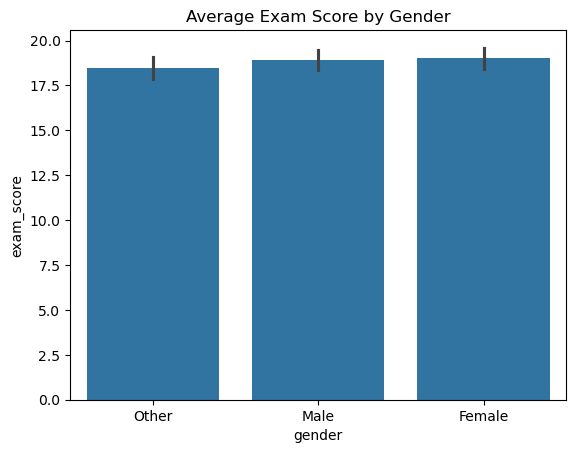

<Figure size 640x480 with 0 Axes>

In [111]:
sns.barplot(x='gender', y='exam_score', data=df)
plt.title("Average Exam Score by Gender")
plt.show()
plt.savefig("Average Exam Score by Gender")

In [112]:
df.groupby('internet_quality')['productivity_score'].mean()

internet_quality
Average    37.446099
Good       36.941672
Poor       37.431896
Name: productivity_score, dtype: float64

In [113]:
df.groupby(['gender','study_hours'])['exam_score'].mean()

gender  study_hours
Female  0.00            6.57
        0.01           10.52
        0.02            1.00
        0.05            1.00
        0.07            1.00
                       ...  
Other   9.48           42.51
        9.61           37.92
        9.63           37.95
        9.90           32.54
        10.55          38.22
Name: exam_score, Length: 1956, dtype: float64

In [114]:
df.groupby('burnout_level')['productivity_score'].mean()

burnout_level
1.00     38.14
1.18     53.85
1.92     68.54
3.66     64.02
4.01     64.27
         ...  
87.58    67.56
87.98    30.32
91.11    15.54
93.41     1.00
97.58    17.83
Name: productivity_score, Length: 3256, dtype: float64

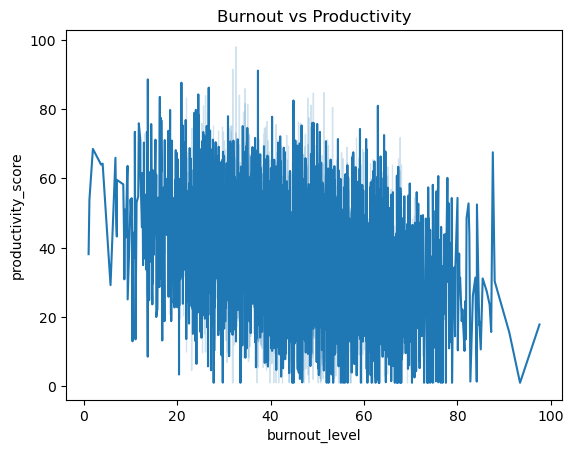

<Figure size 640x480 with 0 Axes>

In [117]:
sns.lineplot(x='burnout_level', y='productivity_score', data=df)
plt.title("Burnout vs Productivity")
plt.show()
plt.savefig("Burnout vs Productivity")

In [83]:
df.groupby('social_media_hours')['exam_score'].mean()

social_media_hours
0.00    20.729680
0.01    17.856667
0.03    19.360000
0.04    18.985000
0.05    17.504000
          ...    
7.81    12.390000
7.97    11.300000
8.20    28.160000
8.21     1.860000
8.28     8.860000
Name: exam_score, Length: 662, dtype: float64

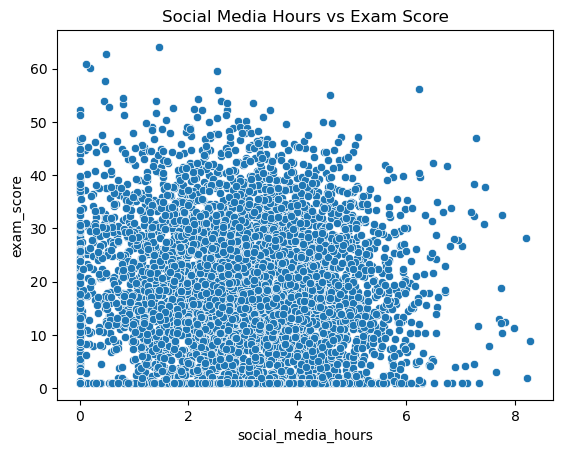

<Figure size 640x480 with 0 Axes>

In [118]:
sns.scatterplot(x='social_media_hours', y='exam_score', data=df)
plt.title("Social Media Hours vs Exam Score")
plt.show()
plt.savefig("Social Media Hours vs Exam Score")

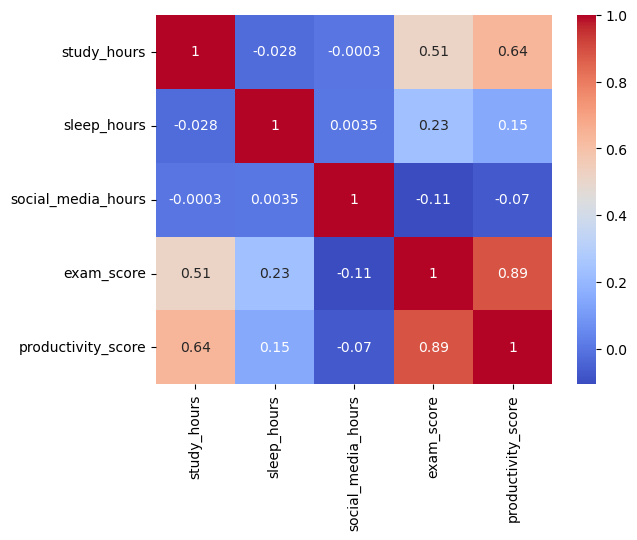

In [119]:
important_cols = ['study_hours','sleep_hours',
                  'social_media_hours',
                  'exam_score',
                  'productivity_score']

sns.heatmap(df[important_cols].corr(), annot=True, cmap='coolwarm')
plt.savefig('columns relations')

In [53]:
x =  df.drop(['exam_score','part_time_job','internet_quality'],axis=1)
y = df['exam_score']

In [54]:
numerical_cols = x.select_dtypes(include=['int64','float64']).columns.tolist()

In [55]:
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()

In [56]:
numerical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

In [57]:
categorical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [58]:
preprocessor = ColumnTransformer(transformers=[
    ('num',numerical_transformer,numerical_cols),
    ('cat',categorical_transformer,categorical_cols)
])

In [59]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
model = Pipeline(steps=[
    ('pre',preprocessor),('reg',LinearRegression())
])

In [61]:
model.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['student_id', 'age',
                                                   'study_hours',
                                                   'self_study_hours',
                                                   'online_classes_hours',
                                                   'social_media_hours',
                                                   'gaming_hours',
                                                   'sleep_hours',
                                                   'screen_time_hours',
                                                   'exercise_minutes',
                                                   'caffeine_intake_mg',
                                                   'upcoming_deadline',
                                                   'mental_health_score',
                                                   'focus_index',
                                                   'burnout_level',
                                                   'productivity_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender',
                                                   'academic_level'])])),
                ('reg', LinearRegression())])

In [62]:
y_pred = model.predict(X_test)

print(f'accuracy:{r2_score(y_test,y_pred)*100:.2f}')

accuracy:81.65


In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
model2 = Pipeline(steps=[
    ('pre',preprocessor),('reg',RandomForestRegressor(n_estimators=200,random_state=42))
     ])

In [65]:
model2.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['student_id', 'age',
                                                   'study_hours',
                                                   'self_study_hours',
                                                   'online_classes_hours',
                                                   'social_media_hours',
                                                   'gaming_hours',
                                                   'sleep_hours',
                                                   'screen_time_hours',
                                                   'exercise_minutes',
                                                   'caffeine_intake_mg',
                                                   'upcoming_deadline',
                                                   'mental_health_score',
                                                   'focus_index',
                                                   'burnout_level',
                                                   'productivity_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender',
                                                   'academic_level'])])),
                ('reg',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [66]:
y_pred2 = model2.predict(X_test)
print(f'accuracy:{r2_score(y_test,y_pred2)*100:.2f}')

accuracy:81.39


In [101]:
joblib.dump(model,'LinearRgression.pkl')


['LinearRgression.pkl']

In [102]:
load = joblib.load('LinearRgression.pkl')
st.title('exam score prediction')
student_id = st.number_input('student_id')
age= st.number_input('age')
gender = st.selectbox('gender',['male','female'])
academic_level = st.selectbox('academic_level',['Postgraduate','High School','Undergraduate'])
study_hours = st.number_input('study_hours')
self_study_hours = st.number_input('self_study_hours')
online_classes_hours = st.number_input('online_classes_hours')
social_media_hours = st.number_input('social_media_hours')
gaming_hours = st.number_input('gaming_hours')
sleep_hours = st.number_input('sleep_hours')
screen_time_hours = st.number_input('screen_time_hours')
exercise_minutes = st.number_input('exercise_minutes')
caffeine_intake_mg = st.number_input('caffeine_intake_mg')
#part_time_job = st.number_input('part_time_job')
upcoming_deadline = st.number_input('upcoming_deadline')
#internet_quality = st.selectbox('internet_quality',['Good','Poor','Average'])
mental_health_score = st.number_input('mental_health_score')
focus_index = st.number_input('focus_index')
burnout_level = st.number_input('burnout_level')
productivity_score = st.number_input('productivity_scorem')

if st.button('predict'):
        data = pd.DataFrame({
              'student_id':[student_id],
                     'age':[age],
                  'gender':[gender],
          'academic_level':[academic_level],
             'study_hours':[study_hours],
        'self_study_hours':[self_study_hours],
    'online_classes_hours':[online_classes_hours],
      'social_media_hours':[social_media_hours],
            'gaming_hours':[gaming_hours],
             'sleep_hours':[sleep_hours],
       'screen_time_hours':[screen_time_hours],
        'exercise_minutes':[exercise_minutes],
      'caffeine_intake_mg':[caffeine_intake_mg],
          #'part_time_job ':[part_time_job],
       'upcoming_deadline':[upcoming_deadline],
       #'internet_quality ':[internet_quality],
     'mental_health_score':[mental_health_score],
             'focus_index':[focus_index],
           'burnout_level':[burnout_level],
     'productivity_score':[productivity_score]
    })
    
        
        prediction = load.predict(data)
        st.success(f'exam score prediction:{prediction[0]}')

2026-02-28 15:41:33.109 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-28 15:41:33.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-28 15:41:33.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-28 15:41:33.112 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-28 15:41:33.112 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-28 15:41:33.113 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-28 15:41:33.116 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-28 15:41:33.118 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar